In [ ]:
#import dependencies/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Data Loading and preprocessing

In [ ]:
df=pd.read_csv('CE802_P2_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
F1       1500 non-null int64
F2       1500 non-null float64
F3       1500 non-null float64
F4       1500 non-null float64
F5       1500 non-null float64
F6       1500 non-null float64
F7       1500 non-null float64
F8       1500 non-null float64
F9       1500 non-null float64
F10      1500 non-null int64
F11      1500 non-null float64
F12      1500 non-null float64
F13      1500 non-null float64
F14      1500 non-null float64
F15      750 non-null float64
Class    1500 non-null bool
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.3 KB


In [ ]:
#impute nan value in f15 column by mean of the values in f15 column
mean_value=df['F15'].mean()
df['F15'].fillna(value=mean_value,inplace=True)

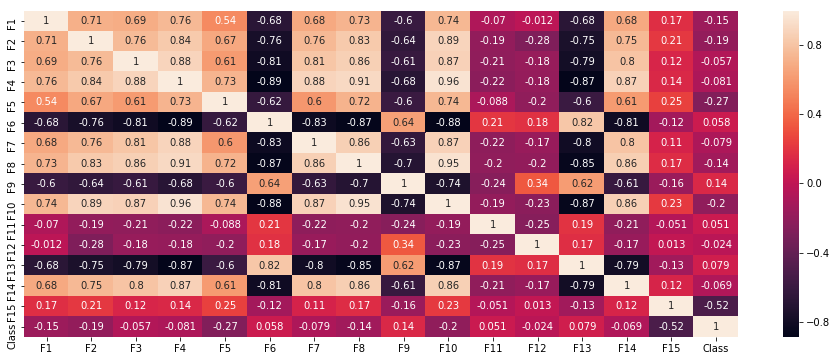

In [ ]:
#heatmap or correlation matrix
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#data formation for training
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
# split data into train and validation data
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
print(X_train.shape, y_train.shape, x_test.shape)

(1200, 15) (1200,) (300, 15)


# decision tree


accuracy for decision tree model 0.81
classification Report for decision tree model
               precision    recall  f1-score   support

       False       0.81      0.85      0.83       162
        True       0.81      0.77      0.79       138

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



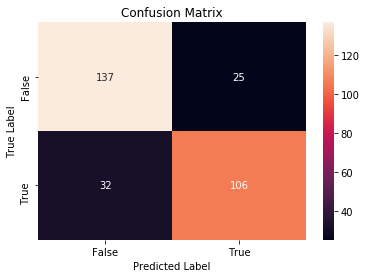

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(X_train,y_train) #fit decision tree classifier on training data

y_pred=clf.predict(x_test) #pmake prediction on validation data
print('accuracy for decision tree model',accuracy_score(y_test,y_pred))
print("classification Report for decision tree model\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred) #confusion matrix
class_label = ["False", "True"]
#plot the above confusion matrix
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# k-nearest neighbours

accuracy for  knn model 0.61
classification Report for knn tree model
               precision    recall  f1-score   support

       False       0.64      0.65      0.64       162
        True       0.58      0.57      0.57       138

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



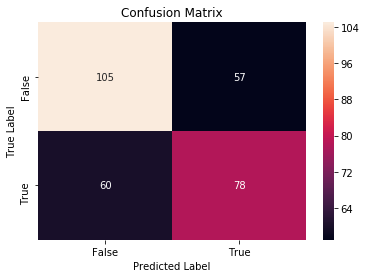

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train) #fit knn classifier on training data
y_pred = knn.predict(x_test) #make prediction on validation data

print('accuracy for  knn model',accuracy_score(y_test,y_pred))
print("classification Report for knn tree model\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred) #confusion matrix
class_label = ["False", "True"]
#plot confusion matrix
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Xg boost

accuracy for xgboost model 0.89
classification Report for xgboost model
               precision    recall  f1-score   support

       False       0.89      0.91      0.90       162
        True       0.89      0.87      0.88       138

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



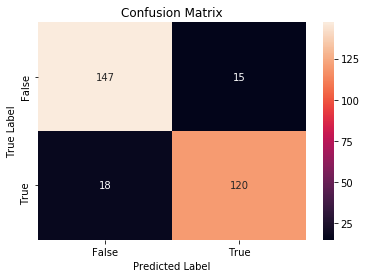

In [ ]:
import xgboost as xgb
Xgb_clf = xgb.XGBClassifier()

Xgb_clf.fit(X_train,y_train) #fit xgboost model on training data

y_pred = Xgb_clf.predict(x_test) #make prediction on validation data

print('accuracy for xgboost model',accuracy_score(y_test,y_pred))
print("classification Report for xgboost model\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred) #confusion matrix
class_label = ["False", "True"]
#plot confsuion matrix
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Prediction on a hold-out test set

In [ ]:
#load test data
df_test=pd.read_csv('CE802_P2_Test.csv')
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,NaN
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,NaN,NaN
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,NaN
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,NaN
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,NaN


In [ ]:
#impute nan values by mean values in column F15
mean_value=df_test['F15'].mean()
df_test['F15'].fillna(value=mean_value,inplace=True)

In [ ]:
df_test_pred=Xgb_clf.predict(df_test.drop('Class',axis=1)) #make prediction on test data using xgboost classifier

In [ ]:
df_test['Class']=df_test_pred

In [ ]:
df_test.to_csv('CE802_P2_Test.csv',index=False) #export to csv